In [1]:
import ftplib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from path import Path

In [2]:
addr = 'ftp.oceanor.info'
username = #
password = #
file_name = '31505.csv'

In [3]:
dirname = Path('../data/buoy').makedirs_p()

In [4]:
with ftplib.FTP(addr) as ftp:
    ftp.login(user=username, passwd=password)
    filelist = []
    ftp.retrlines('LIST ' + file_name, filelist.append)
    filelist = [f.split()[-1] for f in filelist]
    for f in filelist:
        file_name = dirname / f
        with file_name.open('wb') as io:
            ftp.retrbinary('RETR ' + f, io.write)

In [5]:
df = pd.read_csv(file_name, skiprows=1, sep=';',
                 parse_dates=[0], date_parser=lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S'),
                 index_col=0)

In [6]:
df.tail()

,ahDischargedLithium,airHumidity,airPressure,airTemperature,batteryVoltage,chlorophyll000,currDir001,currSp001,hm0,hmax,irradiance,latitude,longitude,mdir,temperature000,thtp,tp,ts,windDirection,windSpeed
Time,,,,,,,,,,,,,,,,,,,,
2018-03-07 08:00:00,86.0625,65.625,1021.8750,-1.7188,11.8281,0.0,104.0625,17.87109,2.813,3.9844,0.000,70.640106,-15.429535,82.9688,-0.40479,98.4375,9.8438,7.4570,158.9063,9.1406
2018-03-07 09:00:00,86.0625,64.063,1021.8750,-1.7188,11.9063,0.0,123.0469,13.84277,2.813,4.4531,23.438,70.641937,-15.429535,82.9688,-0.51758,102.6563,9.6094,7.3438,154.6875,9.8438
2018-03-07 10:00:00,87.1250,65.625,1020.8984,-1.8750,12.0625,0.0,137.8125,19.77539,2.813,4.4531,70.313,70.643311,-15.428009,87.1875,-0.53369,108.2813,8.7891,7.0039,146.2500,9.1406
2018-03-07 11:00:00,87.1250,79.688,1020.8984,-1.8750,12.0625,0.0,151.8750,20.28809,2.813,4.1016,117.188,70.644226,-15.426483,84.3750,-0.54443,106.8750,9.8438,7.5703,140.6250,8.9063
2018-03-07 12:00:00,87.1250,79.688,1020.8984,-2.3438,12.1406,0.0,127.9688,11.49902,3.125,4.5703,164.063,70.644684,-15.425720,73.1250,-0.54980,97.0313,9.3750,7.3438,140.6250,9.3750


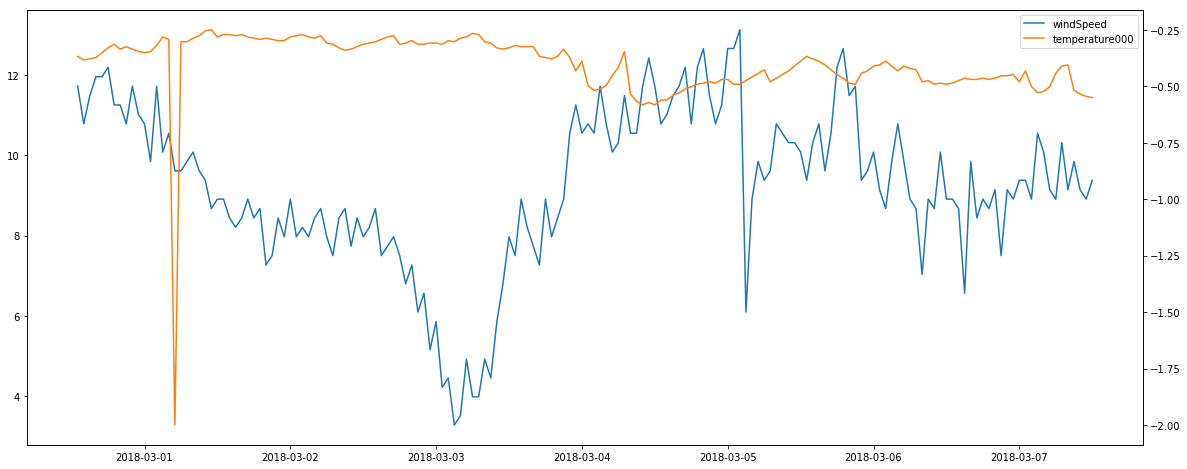

In [7]:
fig0, ax0 = plt.subplots(figsize=(20, 8))
ax1 = ax0.twinx()
h0 = ax0.plot(df.windSpeed)
h1 = ax1.plot(df.temperature000, color='C1')


lns = h0 + h1
labs = [l.get_label() for l in lns]
ax0.legend(lns, labs, loc=0);

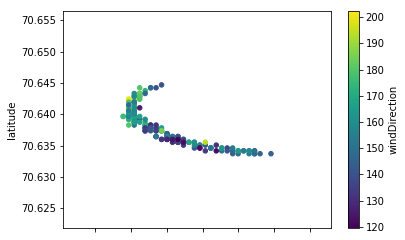

In [8]:
df.plot(x='longitude', y='latitude', c='windDirection', kind='scatter', cmap='viridis')